In [1]:
import pandas as pd
import numpy as np
import geopandas
import os
%matplotlib inline

In [31]:
crime_data = pd.read_csv("group-analysis/data/Blotter.csv")
crime_data.head(5)
#data.pivot(columns="INCIDENTNEIGHBORHOOD", values="INCIDENTHIERARCHYDESC").head(10)

crime_data = crime_data.drop(columns=['PK','CCR','HIERARCHY','CLEAREDFLAG','INCIDENTTRACT','COUNCIL_DISTRICT','PUBLIC_WORKS_DIVISION','OFFENSES','INCIDENTZONE'])
crime_data = crime_data.rename(columns={'INCIDENTNEIGHBORHOOD':'Neighborhood','INCIDENTHIERARCHYDESC':'Description'})
##data.loc[data['Description'] == 'THEFT']
crime_data[crime_data['Description'].str.contains('THEFT',na=False)]

,INCIDENTTIME,INCIDENTLOCATION,Neighborhood,Description,X,Y
1,2016-01-01T00:01:00,"5400 Block Carnegie ST Pittsburgh, PA 15201",Upper Lawrenceville,THEFT BY DECEPTION,-79.950295,40.482290
19,2016-01-01T01:30:00,20 Block Market (Nola on theSquare) ST Pittsbu...,Golden Triangle/Civic Arena,THEFT FROM BUILDING,-80.004259,40.438071
32,2016-01-01T02:00:00,"5500 Block Centre AV Pittsburgh, PA 15232",Friendship,THEFT/PROP-LOST/MISLAID/DEL,-79.936435,40.456633
33,2016-01-01T02:00:00,"2000 Block Spring ST Pittsburgh, PA 15210",Arlington,MTR VEH THEFT (AUTO),-79.978561,40.417595
34,2016-01-01T02:00:00,"1300 Block Federal ST Pittsburgh, PA 15212",Central Northside,MTR VEH THEFT (AUTO),-80.006873,40.456731
...,...,...,...,...,...,...
275950,2022-03-15T13:30:00,"2100 Block Moredale ST Pittsburgh, PA 15210",Brookline,THEFT FROM AUTO,-80.004260,40.397193
275952,2022-03-14T16:00:00,"3300 Block Perrysville AV Pittsburgh, PA 15214",Perry North,MTR VEH THEFT (AUTO),0.000000,0.000000
275953,2022-03-14T14:00:00,"7200 Block Stranahan ST Pittsburgh, PA 15206",Homewood North,"THEFT M.V. PARTS,ACCESSORIES",-79.894450,40.462564
275955,2022-03-15T15:00:00,"Spring WY & 20th ST Pittsburgh, PA 15222",Strip District,THEFT FROM AUTO,-79.983626,40.450833


In [89]:
crime_data.groupby("Neighborhood").count()

,INCIDENTTIME,INCIDENTLOCATION,Description,X,Y
Neighborhood,,,,,
Allegheny Center,2976,2976,2066,2976,2976
Allegheny West,944,944,655,944,944
Allentown,4412,4412,2836,4412,4412
Arlington,1756,1756,1260,1756,1756
Arlington Heights,438,438,334,438,438
...,...,...,...,...,...
Upper Lawrenceville,1364,1364,835,1364,1364
West End,1006,1006,412,1006,1006
West Oakland,1628,1628,975,1628,1628


In [90]:
crime_data["Neighborhood"].value_counts()

South Side Flats             15843
Central Business District    14540
Carrick                       9716
Bloomfield                    7388
Shadyside                     7109
                             ...  
Outside State                  260
Troy Hill-Herrs Island         252
Outside County                 189
Mt. Oliver Neighborhood        117
Mt. Oliver Boro                 86
Name: Neighborhood, Length: 98, dtype: int64

In [91]:
crime_neighborhood_counts = data['Neighborhood'].value_counts().sort_values(ascending=True) #this is a series
#crimedata = crimedata.rename('Neighborhood')
crime_neighborhood_counts = pd.DataFrame(crime_neighborhood_counts) #convert to dataframe to make it easier to read
crime_neighborhood_counts

,Neighborhood
Mt. Oliver Boro,86
Mt. Oliver Neighborhood,117
Outside County,189
Troy Hill-Herrs Island,252
Outside State,260
...,...
Shadyside,7109
Bloomfield,7388
Carrick,9716
Central Business District,14540


AttributeError: 'AxesSubplot' object has no attribute 'head'

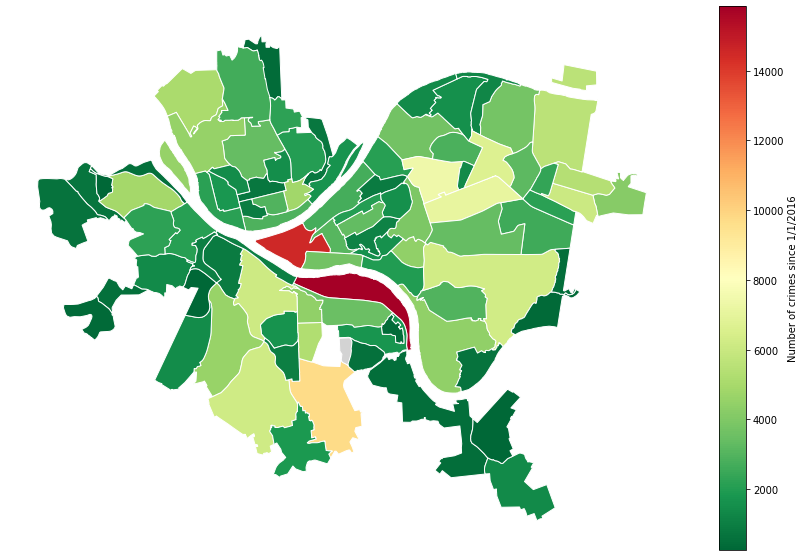

In [87]:
neighborhoods = geopandas.read_file("group-analysis/Neighborhoods/Neighborhoods_.shp") 

crime_map = neighborhoods.merge(crime_neighborhood_counts, how = 'left',left_on = 'hood',right_index = True)
crime_map = crime_map.plot(column = 'Neighborhood', cmap = 'RdYlGn_r', edgecolor = 'white', legend = True, 
               legend_kwds = {'label': "Number of crimes since 1/1/2016"}, figsize = (15,10),
                missing_kwds={"color": "lightgrey"},)
crime_map.set_axis_off()
# crime_map.explore()


#how to make map interactive like on the geopandas documentation?


In [17]:
poor_housing_data = pd.read_csv("group-analysis/data/poorhousingconditions.csv")
poor_housing.head(5)

#TRACT is census the census tract number of each region
#PPoorCon is the percentage of housing deemed to be in poor condition


,TRACT,PPoorCon
0,431100,0.022593
1,432300,0.015898
2,563800,0.016079
3,563300,0.018003
4,451104,0.009339


In [18]:
neighborhoods['tractce10'] = neighborhoods.tractce10.replace(' ',np.nan).astype(float)
neighborhoods['tractce10'] = pd.to_numeric(neighborhoods['tractce10'])

In [19]:
poor_housing_map = neighborhoods.merge(poor_housing, how='left', left_on='tractce10', right_on='TRACT')

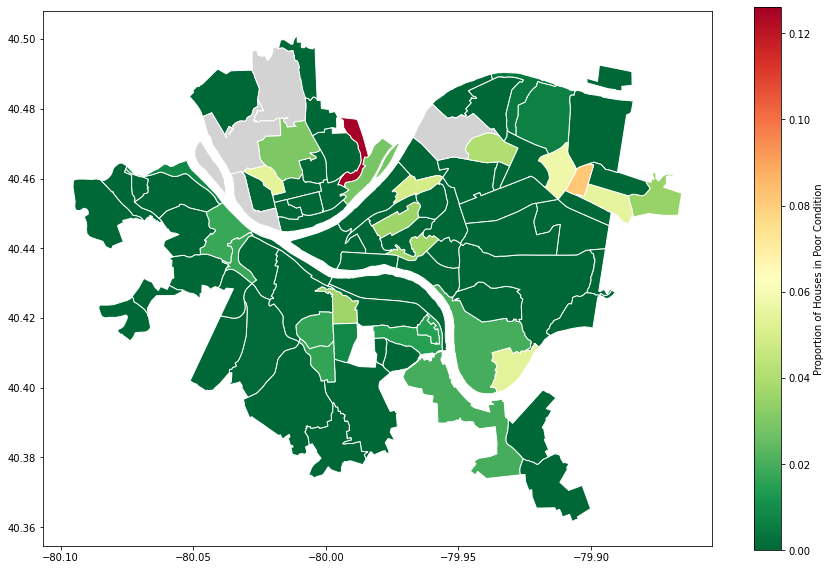

In [20]:
neighborhoods = geopandas.read_file("group-analysis/Neighborhoods/Neighborhoods_.shp")

poor_housing_map.plot(column='PPoorCon', # set the data to be used for coloring
               cmap='RdYlGn_r',              # choose a color palette
               edgecolor="white",        # outline the districts in white
               legend=True,              # show the legend
               legend_kwds={'label': "Proportion of Houses in Poor Condition"}, # label the legend
               figsize=(15, 10),         # set the size
               missing_kwds={"color": "lightgrey"} # set disctricts with no data to gray
               )

In [56]:
poor_housing_map['conditionsRank'] = poor_housing_map['PPoorCon'].rank(method = 'min', ascending = True)
poor_housing_map.sort_values(by=['conditionsRank'], inplace=True)
poor_housing_map.filter(items = ['hood', 'PPoorCon', 'conditionsRank']).head()

,hood,PPoorCon,conditionsRank
0,Central Oakland,0.0,1.0
77,East Liberty,0.0,1.0
5,Central Business District,0.0,1.0
6,Spring Hill-City View,0.0,1.0
79,New Homestead,0.0,1.0


In [98]:
crime_neighborhood_counts['crimeRank'] = crime_neighborhood_counts['Neighborhood'].rank(method = 'min', ascending = True)
crime_neighborhood_counts.sort_values(by=['crimeRank'], inplace=True)
crime_neighborhood_counts['hood'] = crime_neighborhood_counts.index
crime_neighborhood_counts.head()

,Neighborhood,hood,crimeRank
Mt. Oliver Boro,86,Mt. Oliver Boro,1.0
Mt. Oliver Neighborhood,117,Mt. Oliver Neighborhood,2.0
Outside County,189,Outside County,3.0
Troy Hill-Herrs Island,252,Troy Hill-Herrs Island,4.0
Outside State,260,Outside State,5.0


In [100]:
neighborhoods = geopandas.read_file("group-analysis/Neighborhoods/Neighborhoods_.shp")

ranking_data = pd.DataFrame(neighborhoods['hood'])

ranking_data = pd.merge(ranking_data, poor_housing_map[['hood','conditionsRank']],left_on='hood', right_on='hood', how='left')

# ranked_map = neighborhoods.merge(ranking_data, how = 'left',left_on = 'hood',right_index = True)

ranking_data = pd.merge(ranking_data, crime_neighborhood_counts[['hood','crimeRank']], left_on='hood', right_on='hood', how='left')


,hood,conditionsRank,crimeRank
0,Central Oakland,1.0,80.0
1,North Oakland,1.0,75.0
2,West Oakland,78.0,41.0
3,Crawford-Roberts,1.0,66.0
4,Strip District,1.0,61.0
